In [1]:
import time
import copy
import numpy as np
from skimage.filters import gaussian
import cv2

import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

from tifffile import imread, imsave
import cPickle as pickle

%reload_ext autoreload
%autoreload 2

from netsurface2d import NetSurf2d
from netsurface2dt import NetSurf2dt
from data3d import Data3d

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [17]:
# filename = '/Users/jug/Repositories/GIT/BobSeg/TestLapseData2d_151119-nmy2GFP-tagRfpPH-wt-04_w1LMM_488+488_LP_myTestCrop_bgrem.tif'
filename = '/Users/jug/Dropbox/ProjectGoldstein/4MyosinMembraneWholeEmbryo.tif'
#filename = '/Users/jug/Repositories/GIT/BobSeg/data/MAX_LP320-06-08_Concat-51-100.tif'
#filename = '/home/hp/git/BobSeg/data/MAX_LP320-06-08_Concat-1-50.tif'


stack = imread(filename)

segchannel = stack[:,0,:,:]
flowchannel = stack[:,1,:,:]
sigma = [0.,2.,2.]
segchannel_smooth = gaussian(segchannel,sigma)

In [42]:
t=50

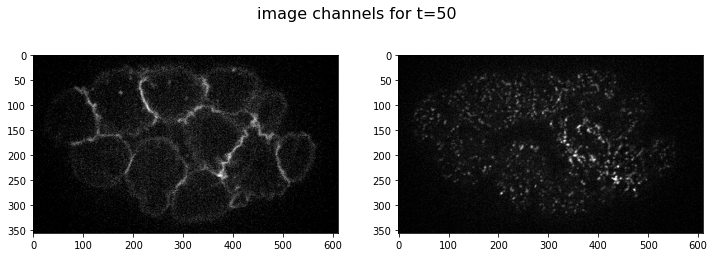

In [43]:
pylab.rcParams['figure.figsize'] = (12, 4)
fig = plt.figure()
fig.suptitle('image channels for t=%d'%t, fontsize=16)
ax = fig.add_subplot(121)
ax.imshow(segchannel[t], plt.get_cmap('gray'))
ax = fig.add_subplot(122)
ax.imshow(flowchannel[t], plt.get_cmap('gray'))

In [44]:
def compute_flow( flowchannel ):
    flows = [None] * len(flowchannel)
    prvs = flowchannel[0]
    for f in range(flowchannel.shape[0]):
        nxt = flowchannel[f]
        flow = cv2.calcOpticalFlowFarneback(prev=prvs,
                                            next=nxt,
                                            pyr_scale=0.5,
                                            levels=3,
                                            winsize=5,
                                            iterations=15,
                                            poly_n=5,
                                            poly_sigma=1.5,
                                            flags=1)
        flows[f] = flow
        prvs = nxt
        print '.',
    print ' ...done!'
    return flows

In [45]:
flows = compute_flow( flowchannel );

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .  ...done!


In [46]:
shape(flows)

(75, 356, 610, 2)

In [47]:
flow_x = np.moveaxis(np.swapaxes(flows,0,3)[0],-1,0)
flow_y = np.moveaxis(np.swapaxes(flows,0,3)[1],-1,0)

In [48]:
shape(flow_x)

(75, 356, 610)

In [60]:
avg_flow_x = np.average(flow_x[30:], axis=0)
avg_flow_y = np.average(flow_y[30:], axis=0)

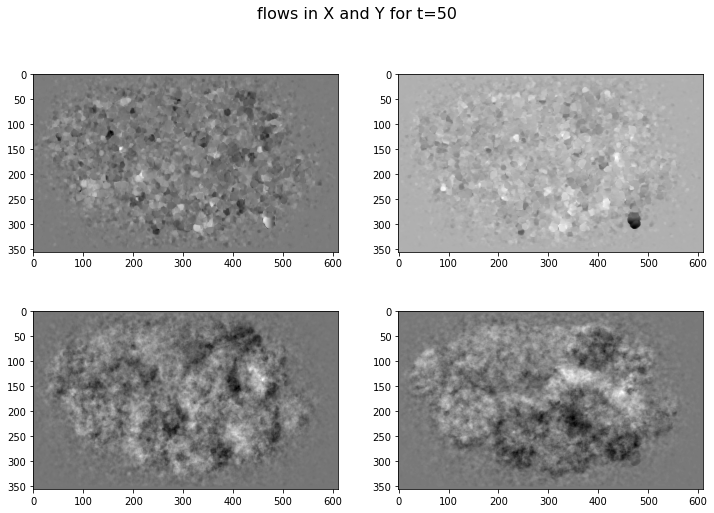

In [61]:
pylab.rcParams['figure.figsize'] = (12, 8)
fig = plt.figure()
fig.suptitle('flows in X and Y for t=%d'%t, fontsize=16)
ax = fig.add_subplot(221)
ax.imshow(flow_x[t], plt.get_cmap('gray'))
ax = fig.add_subplot(222)
ax.imshow(flow_y[t], plt.get_cmap('gray'))
ax = fig.add_subplot(223)
ax.imshow(avg_flow_x, plt.get_cmap('gray'))
ax = fig.add_subplot(224)
ax.imshow(avg_flow_y, plt.get_cmap('gray'))

In [62]:
y,x = np.mgrid[0:shape(segchannel)[1]:1, 0:shape(segchannel)[2]:1]

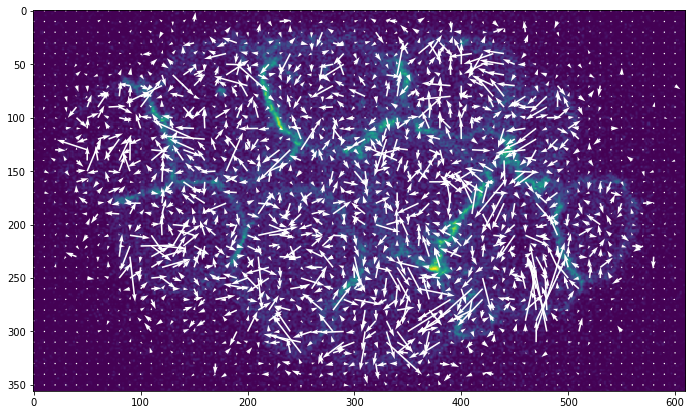

In [65]:
pylab.rcParams['figure.figsize'] = (12, 7)
fig = plt.figure()
fig, ax = plt.subplots()

ax.imshow(segchannel[t])#, plt.get_cmap('gray'))
skip = (slice(None, None, 10), slice(None, None, 10))

ax.quiver(x[skip],y[skip],flow_x[t][skip],-flow_y[t][skip], color='w')

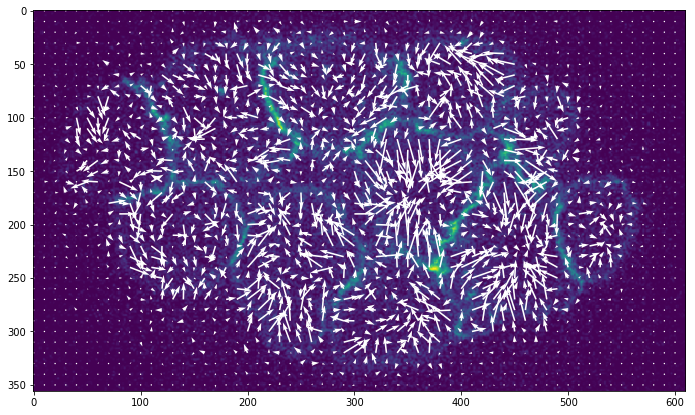

In [66]:
pylab.rcParams['figure.figsize'] = (12, 7)
fig = plt.figure()
fig, ax = plt.subplots()

ax.imshow(segchannel[t])#, plt.get_cmap('gray'))
skip = (slice(None, None, 10), slice(None, None, 10))

ax.quiver(x[skip],y[skip],avg_flow_x[skip],-avg_flow_y[skip], color='w')